In [ ]:
#healthcare_data_generator.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("🏥 Healthcare Analytics Dashboard Project")
print("🎗️ Based on Cancer Council NSW Experience")
print("=" * 50)

# ================================================================================
# PART 1: HEALTHCARE DATA GENERATION
# ================================================================================

print("📊 GENERATING COMPREHENSIVE HEALTHCARE DATA")
print("=" * 40)

# Set random seed for reproducibility
np.random.seed(42)

# Date range: 2 years of daily data
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='D')

# Healthcare facility structure
departments = ['Oncology', 'Emergency', 'Surgery', 'Cardiology', 'Pediatrics', 
               'Radiology', 'Laboratory', 'Outpatient', 'ICU', 'Mental Health']
facilities = ['Central Hospital', 'North Clinic', 'South Medical Center', 
              'East Outpatient', 'West Specialty Center']
regions = ['NSW Central', 'NSW North', 'NSW South', 'NSW West', 'Sydney Metro']

# Treatment and service types
treatment_types = ['Chemotherapy', 'Radiation Therapy', 'Surgery', 'Immunotherapy',
                  'Clinical Trial', 'Screening', 'Consultation', 'Follow-up',
                  'Emergency Care', 'Preventive Care']

# Staff categories
staff_categories = ['Oncologists', 'Nurses', 'Technicians', 'Support Staff',
                   'Administrators', 'Volunteers', 'Research Staff']

print(f"📅 Generating data for {len(date_range)} days")
print(f"🏥 Departments: {len(departments)}")
print(f"🏢 Facilities: {len(facilities)}")
print(f"💊 Treatment Types: {len(treatment_types)}")

# ================================================================================
# PART 2: PATIENT DATA GENERATION
# ================================================================================

print("\n👥 GENERATING PATIENT DATA")
print("=" * 25)

# Generate patient records
patient_data = []
patient_id = 1

for date in date_range[::7]:  # Weekly data points for manageable size
    for facility in facilities:
        for department in departments:
            
            # Determine base patient volume by department
            base_volume = {
                'Oncology': 45,
                'Emergency': 120,
                'Surgery': 25,
                'Cardiology': 35,
                'Pediatrics': 60,
                'Radiology': 80,
                'Laboratory': 150,
                'Outpatient': 200,
                'ICU': 15,
                'Mental Health': 30
            }[department]
            
            # Facility size factor
            facility_factor = {
                'Central Hospital': 1.5,
                'North Clinic': 0.8,
                'South Medical Center': 1.2,
                'East Outpatient': 0.6,
                'West Specialty Center': 1.0
            }[facility]
            
            # Seasonal factors (flu season, holiday effects)
            month = date.month
            seasonal_factor = 1.0
            if month in [12, 1, 2]:  # Winter - higher volume
                seasonal_factor = 1.2
            elif month in [6, 7, 8]:  # Summer - lower volume
                seasonal_factor = 0.9
            
            # Calculate daily patient volume
            daily_volume = int(base_volume * facility_factor * seasonal_factor * 
                             np.random.uniform(0.8, 1.2))
            
            for treatment_type in treatment_types:
                # Treatment distribution varies by department
                if department == 'Oncology' and treatment_type in ['Chemotherapy', 'Radiation Therapy']:
                    treatment_probability = 0.6
                elif department == 'Emergency' and treatment_type == 'Emergency Care':
                    treatment_probability = 0.8
                elif department == 'Surgery' and treatment_type == 'Surgery':
                    treatment_probability = 0.9
                else:
                    treatment_probability = np.random.uniform(0.05, 0.15)
                
                if np.random.random() < treatment_probability:
                    patients_for_treatment = int(daily_volume * treatment_probability)
                    
                    for _ in range(patients_for_treatment):
                        # Patient demographics
                        age = max(18, int(np.random.gamma(2, 25)))  # Realistic age distribution
                        gender = np.random.choice(['Male', 'Female'], p=[0.48, 0.52])
                        
                        # Treatment outcomes
                        if treatment_type in ['Chemotherapy', 'Radiation Therapy', 'Surgery']:
                            treatment_success_rate = 0.85
                        else:
                            treatment_success_rate = 0.92
                        
                        treatment_success = np.random.random() < treatment_success_rate
                        
                        # Length of stay
                        if department == 'Emergency':
                            length_of_stay = np.random.exponential(0.5)  # Hours
                        elif department == 'ICU':
                            length_of_stay = np.random.gamma(2, 3)  # Days
                        elif treatment_type == 'Surgery':
                            length_of_stay = np.random.gamma(1.5, 2)  # Days
                        else:
                            length_of_stay = np.random.exponential(1)  # Days
                        
                        # Cost calculation
                        base_cost = {
                            'Chemotherapy': 5000,
                            'Radiation Therapy': 3000,
                            'Surgery': 15000,
                            'Immunotherapy': 8000,
                            'Clinical Trial': 2000,
                            'Screening': 500,
                            'Consultation': 300,
                            'Follow-up': 200,
                            'Emergency Care': 2000,
                            'Preventive Care': 150
                        }[treatment_type]
                        
                        total_cost = base_cost * (1 + length_of_stay * 0.1) * np.random.uniform(0.8, 1.2)
                        
                        # Patient satisfaction (1-10 scale)
                        satisfaction = np.random.beta(8, 2) * 10  # Skewed towards high satisfaction
                        
                        patient_data.append({
                            'Patient_ID': patient_id,
                            'Date': date,
                            'Year': date.year,
                            'Month': date.month,
                            'Quarter': f"Q{((date.month-1)//3)+1}",
                            'Facility': facility,
                            'Department': department,
                            'Treatment_Type': treatment_type,
                            'Patient_Age': age,
                            'Patient_Gender': gender,
                            'Length_of_Stay': round(length_of_stay, 1),
                            'Treatment_Cost': round(total_cost, 2),
                            'Treatment_Success': treatment_success,
                            'Patient_Satisfaction': round(satisfaction, 1),
                            'Readmission_30d': np.random.random() < 0.08,  # 8% readmission rate
                            'Insurance_Type': np.random.choice(['Public', 'Private', 'Self-Pay'], p=[0.6, 0.35, 0.05])
                        })
                        
                        patient_id += 1

# Convert to DataFrame
df_patients = pd.DataFrame(patient_data)

print(f"✅ Patient dataset created: {df_patients.shape}")
print(f"👥 Total patients: {len(df_patients):,}")
print(f"💰 Total treatment costs: ${df_patients['Treatment_Cost'].sum()/1e6:.1f}M")

🏥 Healthcare Analytics Dashboard Project
🎗️ Based on Cancer Council NSW Experience
📊 GENERATING COMPREHENSIVE HEALTHCARE DATA
📅 Generating data for 731 days
🏥 Departments: 10
🏢 Facilities: 5
💊 Treatment Types: 10

👥 GENERATING PATIENT DATA
✅ Patient dataset created: (110762, 16)
👥 Total patients: 110,762
💰 Total treatment costs: $546.1M


In [ ]:
#healthcare_dashboard.ipynb

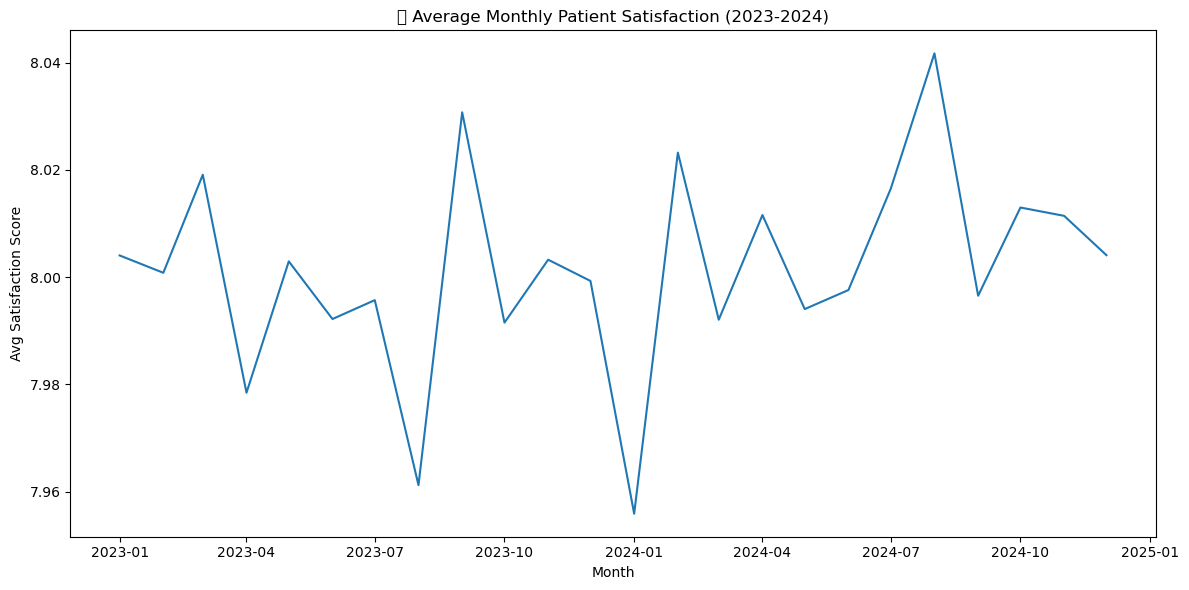

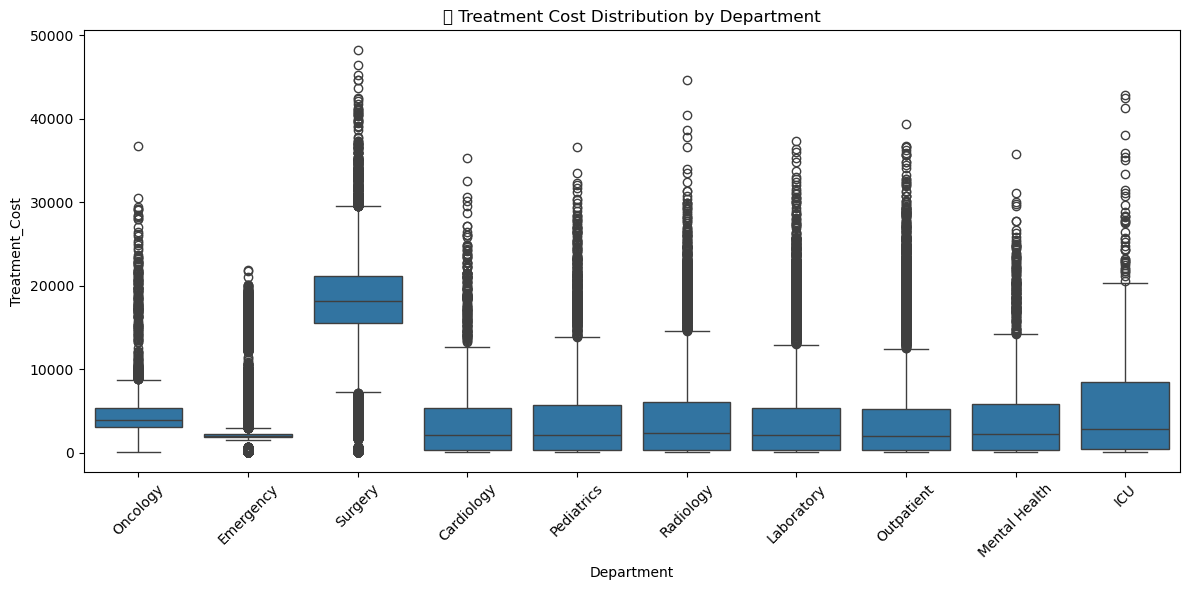

In [5]:
import os

os.makedirs("visuals", exist_ok=True)
os.makedirs("data", exist_ok=True)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# monthly satisfaction trend
monthly_satisfaction = df_patients.groupby(['Year', 'Month'])['Patient_Satisfaction'].mean().reset_index()
monthly_satisfaction['Date'] = pd.to_datetime(monthly_satisfaction['Year'].astype(str) + '-' + monthly_satisfaction['Month'].astype(str) + '-01')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_satisfaction, x='Date', y='Patient_Satisfaction')
plt.title("📈 Average Monthly Patient Satisfaction (2023-2024)")
plt.xlabel("Month")
plt.ylabel("Avg Satisfaction Score")
plt.tight_layout()
import os

os.makedirs("visuals", exist_ok=True)

plt.savefig("visuals/satisfaction_by_month.png")
plt.show()

# dep fee distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_patients, x='Department', y='Treatment_Cost')
plt.title("💰 Treatment Cost Distribution by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visuals/cost_distribution.png")
plt.show()
